In [1]:
%load_ext autoreload
%autoreload 2
from pypvcell.solarcell import SQCell
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc
from pypvcell.illumination import load_astm

In [2]:
def find_voltage(v,i):
    pass


def rev_diode(voltage):
    rev_j01 = 4.46e-19
    rev_bd_v=20
    return -rev_j01*np.exp(sc.e*(-voltage-rev_bd_v)/(sc.k*300)-1)

In [3]:
sq1_cell=SQCell(eg=1.3,cell_T=300,plug_in_term=rev_diode)
sq1_cell.set_input_spectrum(load_astm("AM1.5d"))

sq2_cell=SQCell(eg=2.0,cell_T=300,plug_in_term=rev_diode)
sq2_cell.set_input_spectrum(load_astm("AM1.5d"))

test_v=np.linspace(-2,2.5,num=50)

print(sq1_cell.jsc)
print(sq2_cell.jsc)

test_j1=sq1_cell.get_j_from_v(test_v)
test_j2=sq2_cell.get_j_from_v(test_v)



318.2511987763152
122.8593900884283


(-400, 0)

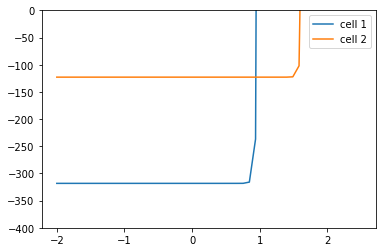

In [4]:
plt.plot(test_v,test_j1,label="cell 1")
plt.plot(test_v,test_j2,label="cell 2")
plt.legend()
plt.ylim([-400,0])

In [5]:
from scipy.optimize import bisect

In [6]:
def f1(x):
    return sq2_cell.get_j_from_v(x)+121

zero_result=bisect(f1,0,10)
print(zero_result)

1.5191315318554643


In [7]:
def f2(x):
    return sq2_cell.get_j_from_v(x)+123



zero_result=bisect(f2,-30,0)
print(zero_result)

-21.067485639960637


In [8]:
def f3(x):
    return sq2_cell.get_j_from_v(x)+(5+0.01)


zero_result=bisect(f3,0,10)
print(zero_result)

1.6263955512079065


In [9]:
def f4(x):
    return sq2_cell.get_j_from_v(x)+(5-0.01)


zero_result=bisect(f4,0,10)
print(zero_result)

1.6263999381305894


In [10]:
f2(0)

0.14060991157170122

In [11]:
f2(-20)

0.14060991157170122

In [12]:
f2(-21.2)

-23.527302894130628

In [13]:
def f5(x,x_0):
    return sq2_cell.get_j_from_v(x)-x_0

In [14]:
zero_result=bisect(f5,0,10,args=5)
print(zero_result)

1.6285031009385875


In [15]:
test_v=np.linspace(-3,1.5,num=10)
test_j1=sq1_cell.get_j_from_v(test_v)

results_1=[]
results_2=[]
for j1 in test_j1:
    try:
        results_1.append(bisect(f5,0,5,args=j1*1.001))
    except ValueError:
        print("no solution found for {}".format(j1*1.001))
    try:
        
        results_2.append(bisect(f5,-30,0,args=j1*0.009))
    except ValueError:
        print("no solution found for {}".format(j1*0.009))

no solution found for -318.5694499750915
no solution found for -2.8642607889868366
no solution found for -318.5694499750915
no solution found for -2.8642607889868366
no solution found for -318.5694499750915
no solution found for -2.8642607889868366
no solution found for -318.5694499750915
no solution found for -2.8642607889868366
no solution found for -318.5694499750915
no solution found for -2.8642607889868366
no solution found for -318.5694499750915
no solution found for -2.8642607889868366
no solution found for -318.5694499750915
no solution found for -2.8642607889868366
no solution found for -318.56944650374453
no solution found for -2.864260757775925
no solution found for 4.968946452081959
no solution found for 1965951393.2319002


In [16]:
results_1

[1.6715349464936935, 2.1781123243442835]

In [17]:
results_2

[]

In [18]:
test_v=np.linspace(-3,3,num=200)
test_j1=sq1_cell.get_j_from_v(test_v)
test_j2=sq2_cell.get_j_from_v(test_v)

results_1=[]
results_2=[]

for j1 in test_j1:
    jj=j1*0.99
    try:
        results_1.append((bisect(f5,-23,5,args=jj),jj))
    except ValueError:
        print("no solution found for {}".format(jj))
                         
                         
    jj=j1*1.01
    try:
        results_1.append((bisect(f5,-23,5,args=jj),jj))
    except ValueError:
        print("no solution found for {}".format(jj))

results_1=np.array(results_1)

for j1 in test_j2:
    jj=j1*0.99
    try:
        results_2.append((bisect(f5,-23,5,args=jj),jj))
    except ValueError:
        print("no solution found for {}".format(jj))
                         
                         
    jj=j1*1.01
    try:
        results_2.append((bisect(f5,-23,5,args=jj),jj))
    except ValueError:
        print("no solution found for {}".format(jj))

results_2=np.array(results_2)

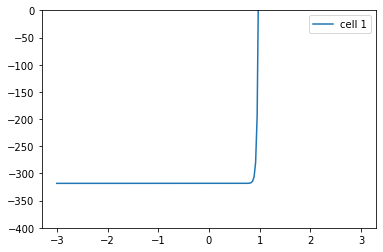

In [19]:
#plt.plot(test_v,np.array(results_1),label="solved sq2")
plt.plot(test_v,sq1_cell.get_j_from_v(test_v),label="cell 1")
plt.ylim([-400,0])
plt.legend()

Get the series-connected voltages

(-400, 1000)

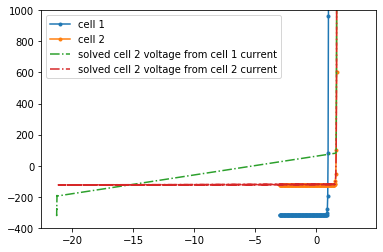

In [20]:
plt.plot(test_v,sq1_cell.get_j_from_v(test_v),'.-',label="cell 1")
plt.plot(test_v,sq2_cell.get_j_from_v(test_v),'.-',label="cell 2")
plt.plot(results_1[:,0],results_1[:,1],'-.',label="solved cell 2 voltage from cell 1 current")
plt.plot(results_2[:,0],results_2[:,1],'-.',label="solved cell 2 voltage from cell 2 current")
plt.legend()
plt.ylim([-400,1000])

In [21]:
def merge_iv_sets(v1,j1,v2,j2):
    
    v3=np.concatenate((v1,v2))
    j3=np.concatenate((j1,j2))
    
    sorted_v3_index=np.argsort(v3)
    
    return v3[sorted_v3_index],j3[sorted_v3_index]
    

In [22]:
v3,j3=merge_iv_sets(results_1[:,0],results_1[:,1],results_2[:,0],results_2[:,1])

(-400, 1000)

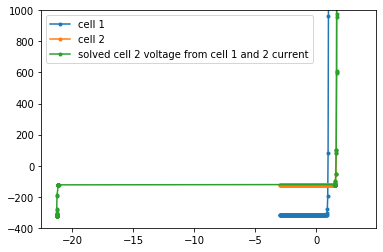

In [23]:
plt.plot(test_v,sq1_cell.get_j_from_v(test_v),'.-',label="cell 1")
plt.plot(test_v,sq2_cell.get_j_from_v(test_v),'.-',label="cell 2")
plt.plot(v3,j3,'.-',label="solved cell 2 voltage from cell 1 and 2 current")
plt.legend()
plt.ylim([-400,1000])

get current of cell 1 using j3

In [24]:
def f6(x,x_0):
    return sq1_cell.get_j_from_v(x)-x_0

result_3=[]
for jj in j3:
   
    try:
        result_3.append((bisect(f6,-23,5,args=jj),jj))
    except ValueError:
        print("no solution found for {}".format(jj))
                         
                         

result_3=np.array(result_3)

In [25]:
from pypvcell.ivsolver import solve_v_from_j_adding_epsilon

In [26]:
result_3=solve_v_from_j_adding_epsilon(sq1_cell.get_j_from_v,j3,bisect,epsilon=0)

(-400, 1000)

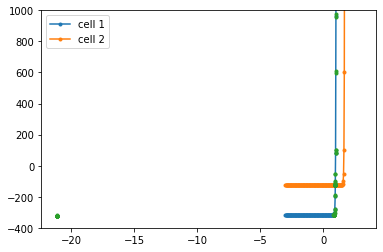

In [27]:
plt.plot(test_v,sq1_cell.get_j_from_v(test_v),'.-',label="cell 1")
plt.plot(test_v,sq2_cell.get_j_from_v(test_v),'.-',label="cell 2")
#plt.plot(v3,j3,'.-',label="solved cell 2 voltage from cell 1 and 2 current")
#plt.plot(result_3[:,0],result_3[:,1],'.')
plt.plot(result_3[:,0],result_3[:,1],'.')
plt.legend()
plt.ylim([-400,1000])

(-25, 3)

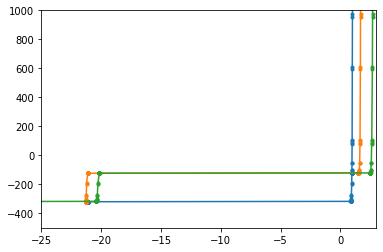

In [28]:
plt.plot(result_3[:,0],result_3[:,1],'.-')
plt.plot(v3,result_3[:,1],'.-')
plt.plot(v3+result_3[:,0],result_3[:,1],'.-')
plt.ylim([-500,1000])
plt.xlim([-25,3])